In [2]:
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from nltk.util import bigrams
from itertools import compress
import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### Word2Vec with CBOW or Skip-gram (2 pts): 
Implement a Word2Vec pre-trained embedding approach to create embeddings of the TweetsCOV19 dataset. Motivate your choice between CBOW or Skip-gram. Explain the methodology and provide a code snippet of the function used to produce these embeddings.

#### Helpfull

https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314#:~:text=Continuous%20Bag%20of%20Words%20Model%20(CBOW)%20and%20Skip%2Dgram&text=In%20the%20CBOW%20model%2C%20the,used%20to%20predict%20the%20context%20

https://medium.com/@martinpella/how-to-use-pre-trained-word-embeddings-in-pytorch-71ca59249f76


import nltk
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import string
import re
from nltk.util import bigrams
from itertools import compress
import numpy as np
import math
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# loading raw data
raw_data = pd.read_csv('data/TweetsCOV19.csv')
# loading data with preprocessed tweets
data = pd.read_csv('data/cleaned_tweets.csv')

/var/folders/n6/w16z2dmj2g9d1pd2dt_r8xl80000gn/T/ipykernel_58172/3145232326.py:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('data/TweetsCOV19.csv')


In [4]:
# get word frequencies
def words_freq(data):

    tweets = data['TweetText'].tolist()
    words = []
    for sentence in tweets:
        words.append(sentence.split())

    words = [item for sublist in words for item in sublist]

    freqs = dict()
    for s in words:
        if s in freqs:
            freqs[s] += 1
        else:
            freqs[s] = 1

    return freqs

words_freqs = words_freq(data)

In [5]:
diff_words = list(words_freqs.keys())
len(diff_words)

596500

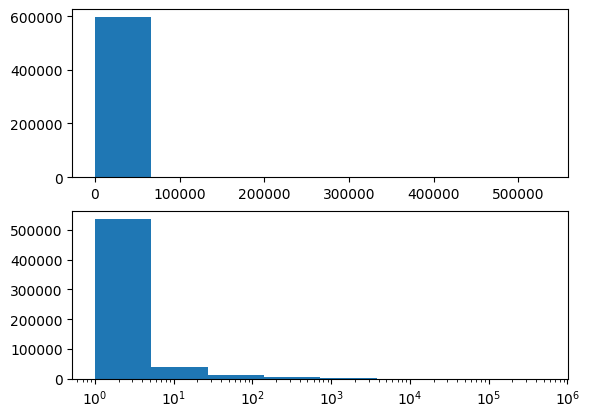

In [10]:
x = pd.Series(list(words_freqs.values()))

# histogram on linear scale
plt.subplot(211)
hist, bins, _ = plt.hist(freqs, bins=8)

# histogram on log scale. 
# Use non-equal bin sizes, such that they look equal on log scale.
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(freqs, bins=logbins)
plt.xscale('log')
plt.show()

In [34]:
def words_more_n(words_freqs, n = 5):
    words_n = []
    for key, val in words_freqs.items():
        if val > n:
            words_n.append(key)

    return words_n

words_n = words_more_n(words_freqs, 1)
len(words_n)

171549

In [20]:
import gensim.downloader
CBOW_vectors = gensim.downloader.load('word2vec-google-news-300')

In [ ]:
CBOW_vectors[]

In [33]:
len(words_freqs)

596500

In [44]:
word2vec = dict()
not_in_dict = []
count_in = 0
count_out = 0
count = 0
for key, val in words_freqs.items():
    if val > 2:
        count += 1
        try:
            emb = CBOW_vectors[key]
            count_in += 1
            word2vec[key] = emb
        except:
            not_in_dict.append(key)
            count_out += 1

print(f'Words overall: {count}')
print(f'Words in:  {count_in}')
print(f'Words out: {count_out}')

Words overall: 108196
Words in:  41758
Words out: 66438


In [39]:
len(word2vec)-len(not_in_dict)

171549

In [18]:
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))
['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

527941